In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

In [5]:
# Load dataset
df = pd.read_csv("House Price India.csv")

# First look
df.head()

# Shape
df.shape

# Data types
df.info()

# Data types
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [6]:
df.shape

(14620, 23)

In [7]:
df.isnull().sum()


# Filling numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Filling categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
# Removing duplicates

df.duplicated().sum()

df.drop_duplicates(inplace=True)


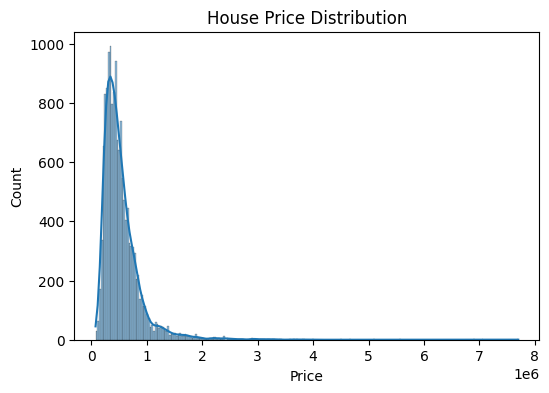

In [9]:
# EDA Exploratory Data Analysis

# Target Distribution

plt.figure(figsize=(6,4))
sns.histplot(df["Price"], kde=True)
plt.title("House Price Distribution")
plt.show()

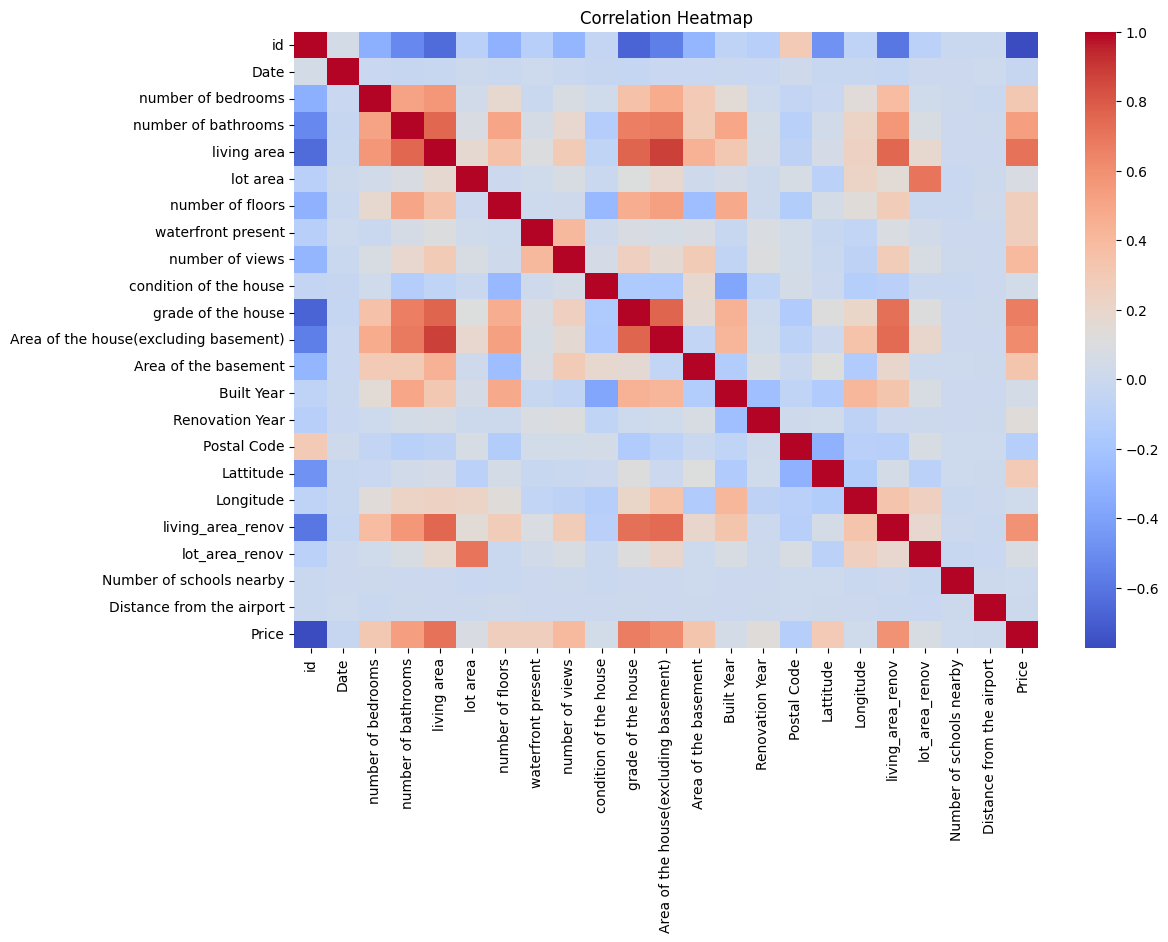

In [10]:
#Correlation Heatmap (Numerical Features)

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
#Feature Engineering & Preprocessing

X = df.drop("Price", axis=1)
y = df["Price"]

num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include='object').columns


In [13]:
# Preprocessing Pipeline

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)


In [14]:
#Spliting the Dataset into Training and Testing Set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Training Regression Models

#Linear Regression 

lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)

#Decision Tree

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

dt_model.fit(X_train, y_train)

# Random Forest 

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)


# Evaluating the Models 

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

results = {
    "Linear Regression": evaluate_model(lr_model, X_test, y_test),
    "Decision Tree": evaluate_model(dt_model, X_test, y_test),
    "Random Forest": evaluate_model(rf_model, X_test, y_test)
}

pd.DataFrame(results).T

final_model = rf_model

# Final Evaluation

final_metrics = evaluate_model(final_model, X_test, y_test)
final_metrics
 
#Saving the Final Model using Pickle

import pickle

with open("house_price_model.pkl", "wb") as file:
    pickle.dump(final_model, file)